In [ ]:
import pandas as pd
d=pd.read_csv('/content/diabetes.csv')
print(d)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# New Section

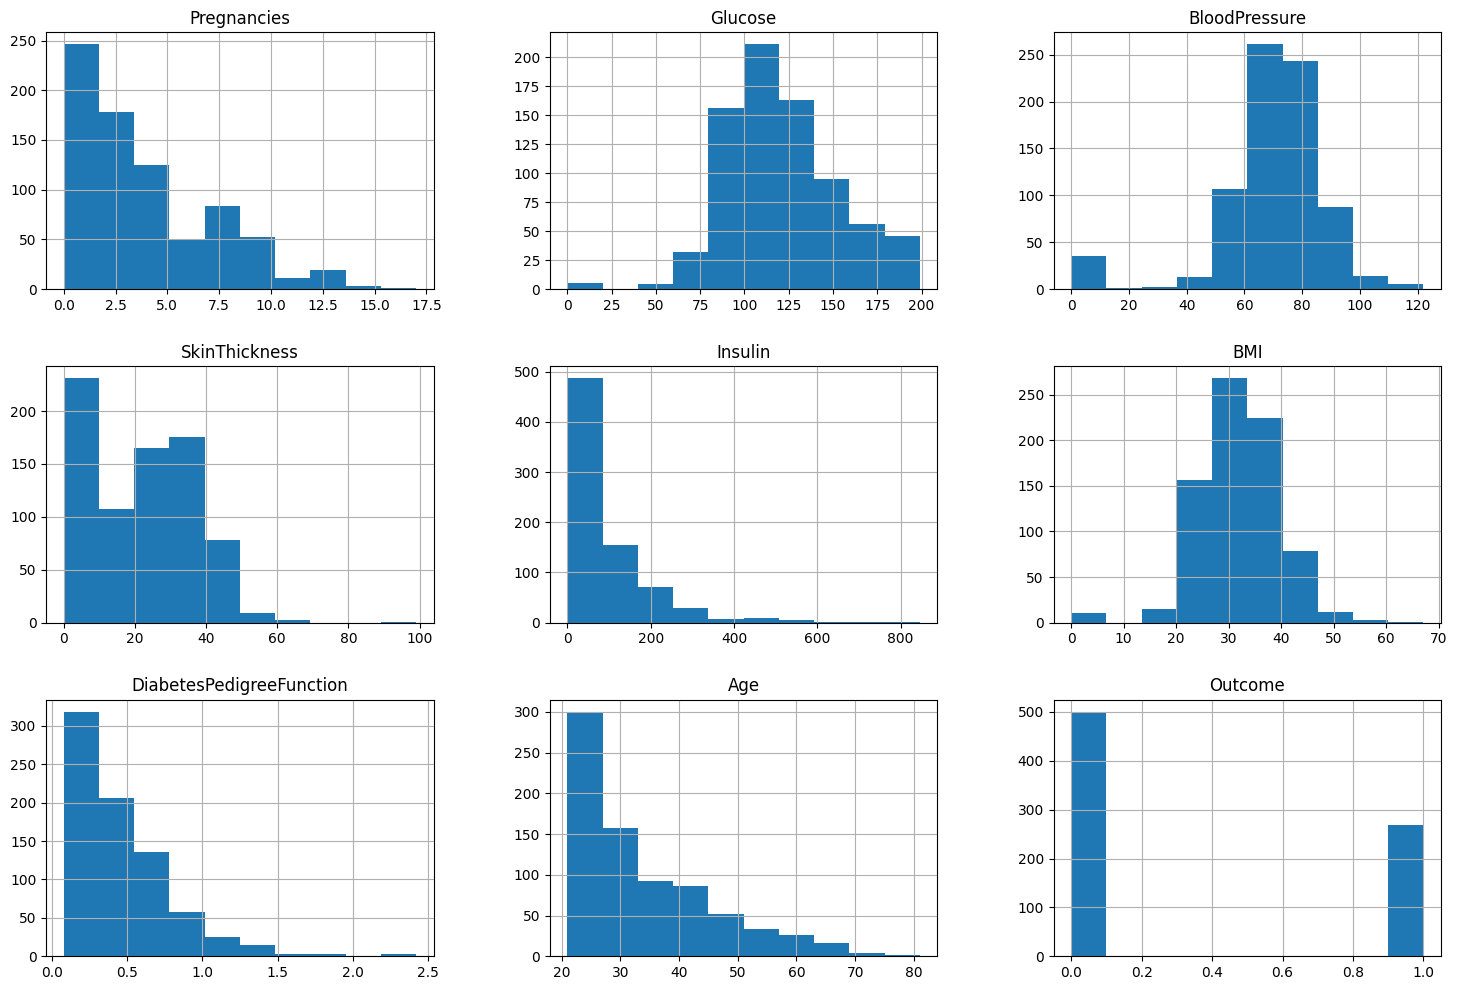

In [ ]:
from matplotlib import pyplot as pt
d.hist(figsize=(18,12))
pt.show()


<Axes: >

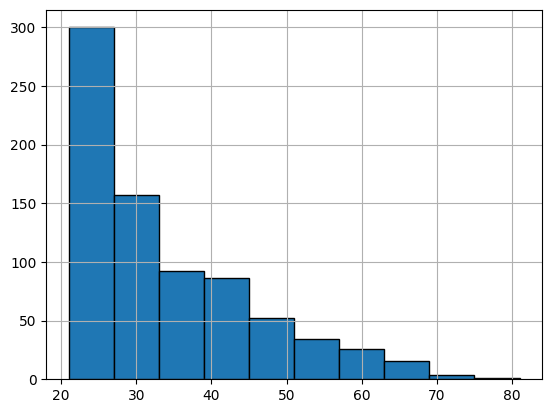

In [ ]:
d["Age"].hist(edgecolor = "black")

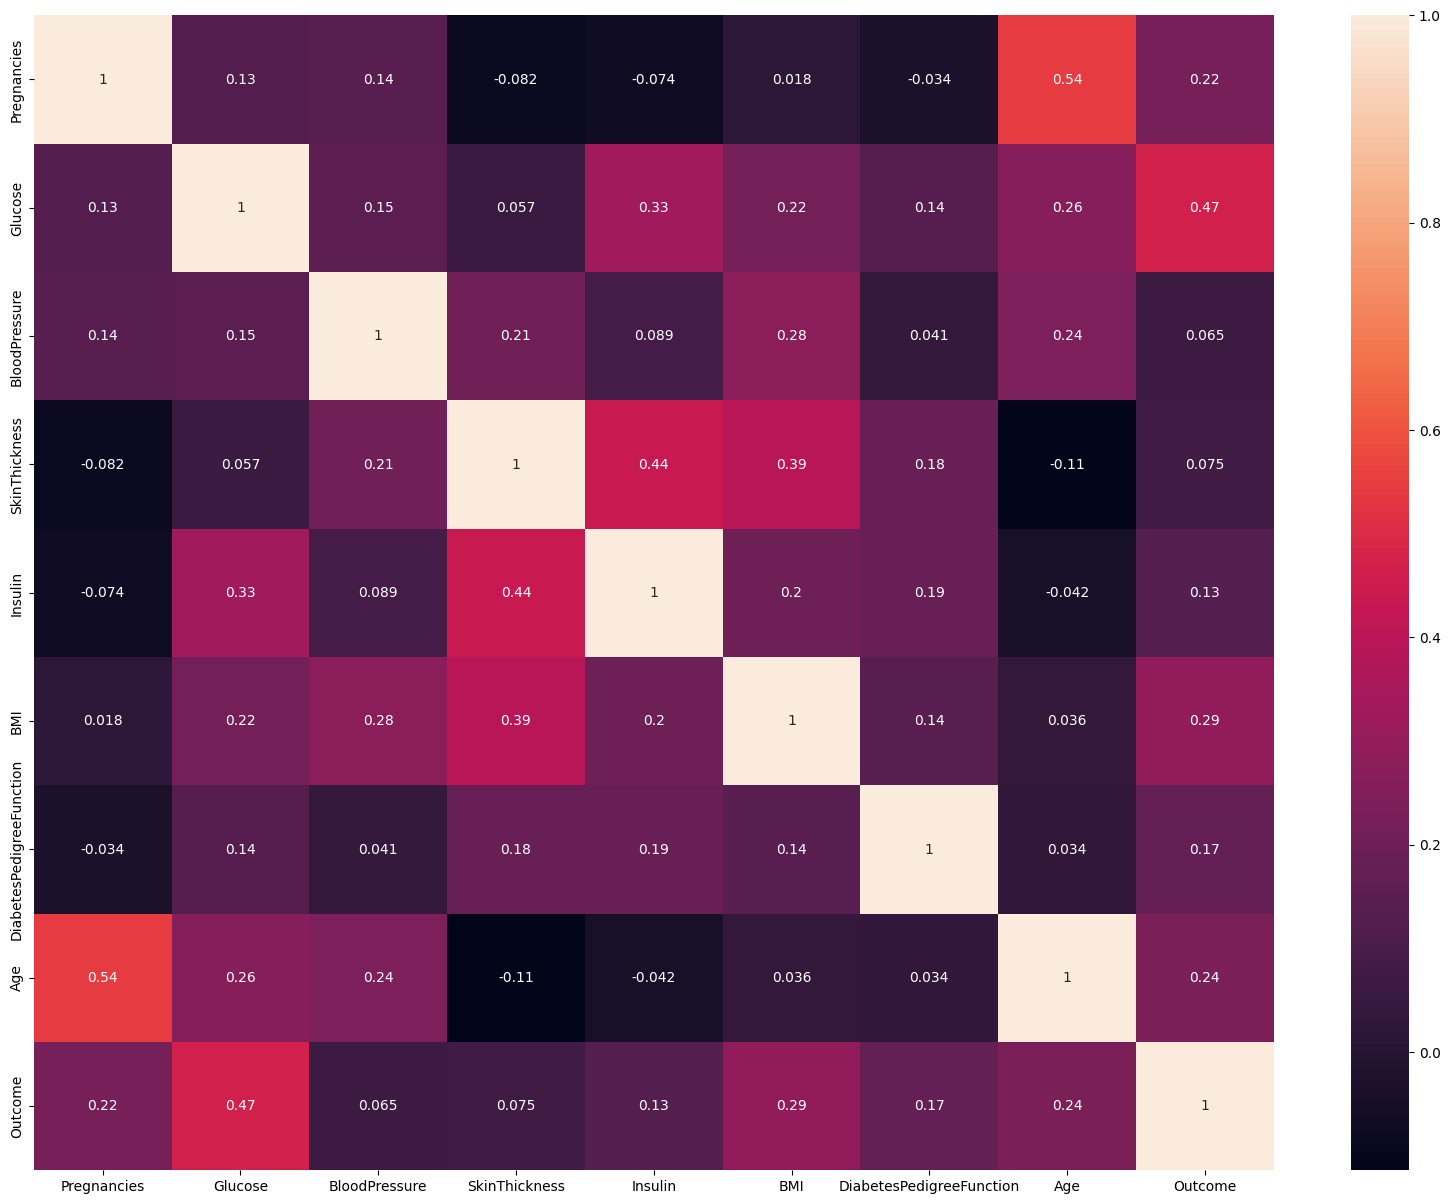

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [ ]:
import seaborn as sn
f, ax = pt.subplots(figsize= [20,15])
sn.heatmap(d.corr(),annot=True)
pt.show()
print(d.corr())

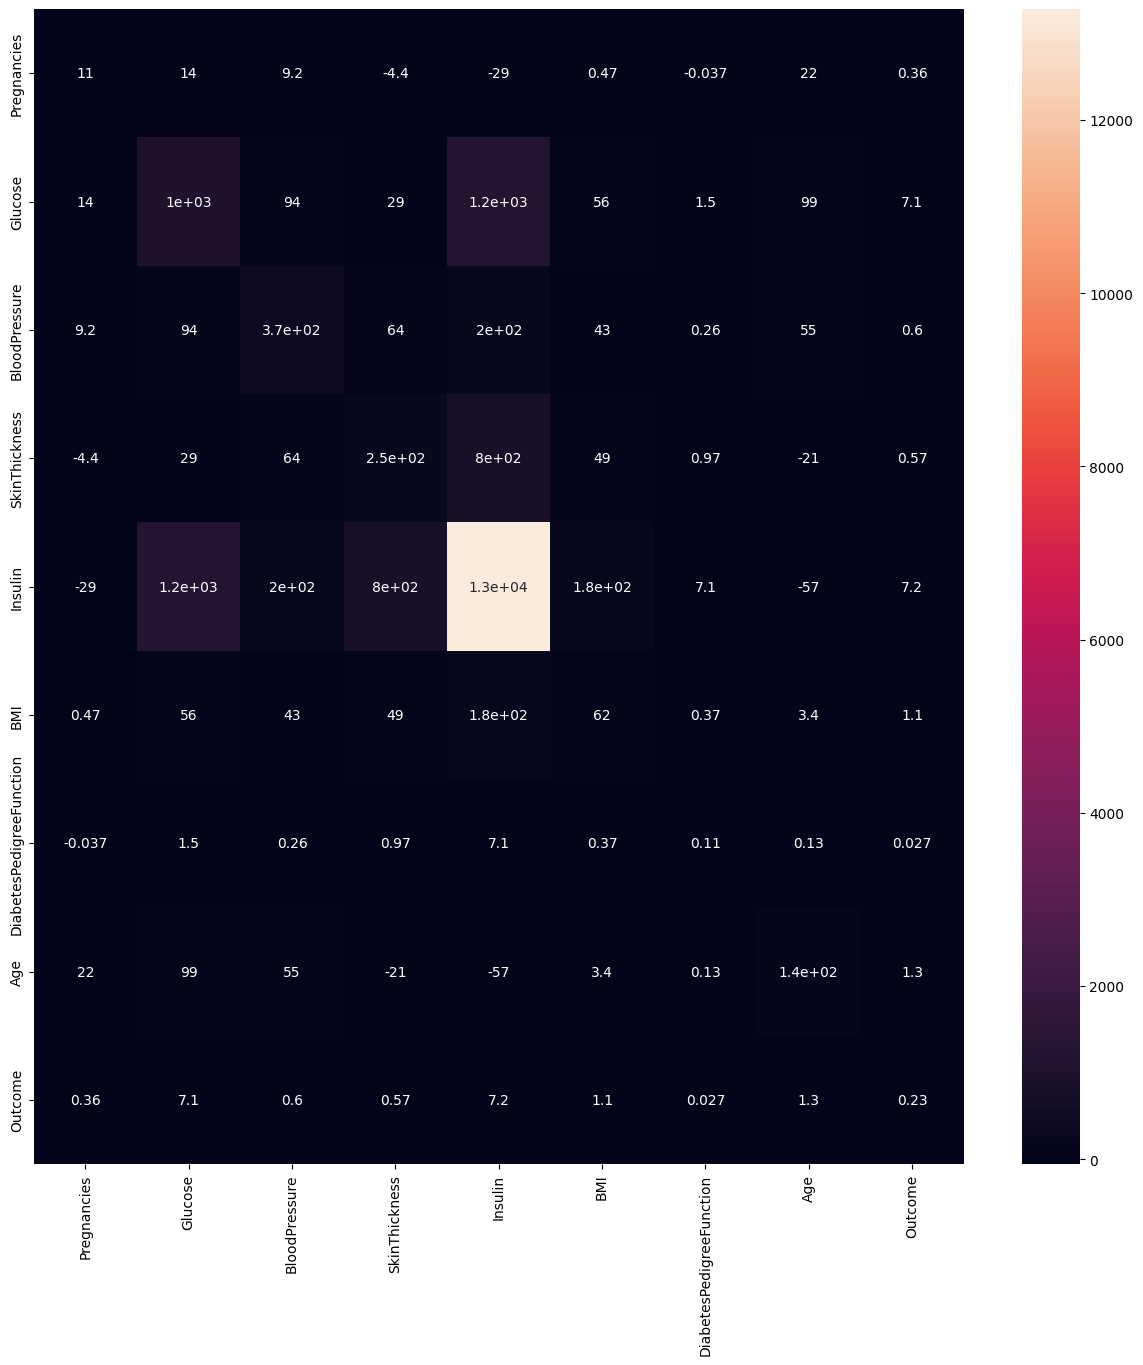

In [ ]:
cov_matrix=pd.DataFrame.cov(d)
ax=pt.subplots(figsize=(15,15))
sn.heatmap(cov_matrix,annot=True)
pt.show()

In [ ]:
x=d.drop(columns='Outcome')
y=d['Outcome']
print(y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
614 614
154 154


Logistic Regression on resampled data

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
x_train1,x_test1,y_train1,y_test1=train_test_split(x_train_resampled,y_train_resampled,test_size=0.2,random_state=0)
print(len(x_train1));
print(len(y_train1));
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train1,y_train1)
y_pred=reg.predict(x_test1)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification report is :\n",classification_report(y_test1,y_pred))
print("Confusion Matrix is :\n",confusion_matrix(y_test1,y_pred))
print("Training score :\n",reg.score(x_train1,y_train1)*100)
print("Mean squared error :\n",mean_squared_error(y_test1,y_pred))
print("R2 score is :\n",r2_score(y_test1,y_pred))
print(accuracy_score(y_test1,y_pred)*100)

628
628
Classification report is :
               precision    recall  f1-score   support

           0       0.79      0.71      0.75        83
           1       0.71      0.79      0.75        75

    accuracy                           0.75       158
   macro avg       0.75      0.75      0.75       158
weighted avg       0.75      0.75      0.75       158

Confusion Matrix is :
 [[59 24]
 [16 59]]
Training score :
 75.95541401273886
Mean squared error :
 0.25316455696202533
R2 score is :
 -0.015261044176706706
74.68354430379746


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN on resampled data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train1,y_train1)
y_pred=knn.predict(x_test1)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification report is :\n",classification_report(y_test1,y_pred))
print("Confusion Matrix is :\n",confusion_matrix(y_test1,y_pred))
print("Training score :\n",knn.score(x_train1,y_train1)*100)
print("Mean squared error :\n",mean_squared_error(y_test1,y_pred))
print("R2 score is :\n",r2_score(y_test1,y_pred))
print(accuracy_score(y_test1,y_pred)*100)

Classification report is :
               precision    recall  f1-score   support

           0       0.83      0.66      0.74        83
           1       0.70      0.85      0.77        75

    accuracy                           0.75       158
   macro avg       0.76      0.76      0.75       158
weighted avg       0.77      0.75      0.75       158

Confusion Matrix is :
 [[55 28]
 [11 64]]
Training score :
 83.43949044585987
Mean squared error :
 0.2468354430379747
R2 score is :
 0.010120481927710978
75.31645569620254


Decision Tree on resampled data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dd=DecisionTreeClassifier()
dd.fit(x_train1,y_train1)
y_pred=dd.predict(x_test1)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,r2_score,mean_squared_error
print("Classification report is :\n",classification_report(y_test1,y_pred))
print("Confusion Matrix is :\n",confusion_matrix(y_test1,y_pred))
print("Training score :\n",dd.score(x_train1,y_train1)*100)
print("Mean squared error :\n",mean_squared_error(y_test1,y_pred))
print("R2 score is :\n",r2_score(y_test1,y_pred))
print(accuracy_score(y_test1,y_pred)*100)

Classification report is :
               precision    recall  f1-score   support

           0       0.84      0.67      0.75        83
           1       0.70      0.85      0.77        75

    accuracy                           0.76       158
   macro avg       0.77      0.76      0.76       158
weighted avg       0.77      0.76      0.76       158

Confusion Matrix is :
 [[56 27]
 [11 64]]
Training score :
 100.0
Mean squared error :
 0.24050632911392406
R2 score is :
 0.03550200803212866
75.9493670886076


SVM on resampled data

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train1,y_train1)
y_pred=svc.predict(x_test1)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,r2_score,mean_squared_error
print("Classification report is :\n",classification_report(y_test1,y_pred))
print("Confusion Matrix is :\n",confusion_matrix(y_test1,y_pred))
print("Training score :\n",svc.score(x_train1,y_train1)*100)
print("Mean squared error :\n",mean_squared_error(y_test1,y_pred))
print("R2 score is :\n",r2_score(y_test1,y_pred))
print(accuracy_score(y_test1,y_pred)*100)

Classification report is :
               precision    recall  f1-score   support

           0       0.78      0.67      0.72        83
           1       0.69      0.79      0.73        75

    accuracy                           0.73       158
   macro avg       0.73      0.73      0.73       158
weighted avg       0.73      0.73      0.73       158

Confusion Matrix is :
 [[56 27]
 [16 59]]
Training score :
 74.20382165605095
Mean squared error :
 0.2721518987341772
R2 score is :
 -0.09140562248995976
72.78481012658227


In [ ]:
import numpy as np
unique,counts=np.unique(y_train_resampled,return_counts=True)
print(np.asarray((unique,counts)).T)


[[  0 393]
 [  1 393]]


Logistic Regression 


In [ ]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification report is :\n",classification_report(y_test,y_pred))
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print("Training score :\n",reg.score(x_train,y_train)*100)
print("Mean squared error :\n",mean_squared_error(y_test,y_pred))
print("R2 score is :\n",r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

Classification report is :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix is :
 [[98  9]
 [18 29]]
Training score :
 77.19869706840392
Mean squared error :
 0.17532467532467533
R2 score is :
 0.1731954662954862
82.46753246753246


KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification report is :\n",classification_report(y_test,y_pred))
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print("Training score :\n",knn.score(x_train,y_train)*100)
print("Mean squared error :\n",mean_squared_error(y_test,y_pred))
print("R2 score is :\n",r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

Classification report is :
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix is :
 [[87 20]
 [18 29]]
Training score :
 78.50162866449512
Mean squared error :
 0.24675324675324675
R2 score is :
 -0.16365082521376006
75.32467532467533


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dd=DecisionTreeClassifier()
dd.fit(x_train,y_train)
y_pred=dd.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification report is :\n",classification_report(y_test,y_pred))
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print("Training score :\n",dd.score(x_train,y_train)*100)
print("Mean squared error :\n",mean_squared_error(y_test,y_pred))
print("R2 score is :\n",r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)


Classification report is :
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       107
           1       0.64      0.74      0.69        47

    accuracy                           0.79       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.80      0.79      0.80       154

Confusion Matrix is :
 [[87 20]
 [12 35]]
Training score :
 100.0
Mean squared error :
 0.2077922077922078
R2 score is :
 0.020083515609465197
79.22077922077922


[Text(0.34870158450704225, 0.9666666666666667, 'x[1] <= 117.5\ngini = 0.5\nsamples = 628\nvalue = [310, 318]'),
 Text(0.1742957746478873, 0.9, 'x[7] <= 29.5\ngini = 0.385\nsamples = 281\nvalue = [208, 73]'),
 Text(0.10093896713615023, 0.8333333333333334, 'x[3] <= 29.5\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(0.06103286384976526, 0.7666666666666667, 'x[0] <= 6.5\ngini = 0.083\nsamples = 115\nvalue = [110, 5]'),
 Text(0.03755868544600939, 0.7, 'x[5] <= 32.7\ngini = 0.068\nsamples = 113\nvalue = [109, 4]'),
 Text(0.018779342723004695, 0.6333333333333333, 'x[6] <= 0.672\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.009389671361502348, 0.5666666666666667, 'gini = 0.0\nsamples = 81\nvalue = [81, 0]'),
 Text(0.028169014084507043, 0.5666666666666667, 'x[6] <= 0.713\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.018779342723004695, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03755868544600939, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0

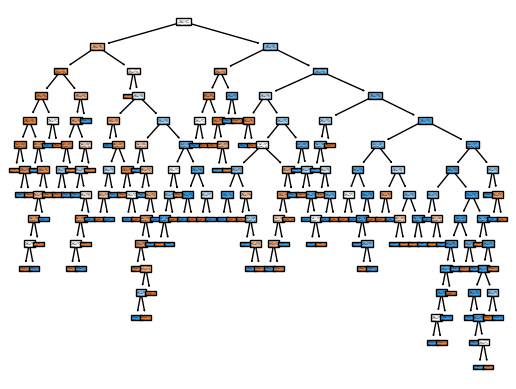

In [ ]:
from sklearn import tree
tree.plot_tree(dd,filled=True)


SVM

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,r2_score,mean_squared_error
print("Classification report is :\n",classification_report(y_test,y_pred))
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred))
print("Training score :\n",svc.score(x_train,y_train)*100)
print("Mean squared error :\n",mean_squared_error(y_test,y_pred))
print("R2 score is :\n",r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)



Classification report is :
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix is :
 [[98  9]
 [23 24]]
Training score :
 75.8957654723127
Mean squared error :
 0.2077922077922078
R2 score is :
 0.020083515609465197
79.22077922077922
